### **Image Classification with CNN**

**1.Build and train a CNN model to do classification on CIFAR10​. You may use the code provided, “cifar.py”, but don’t copy any other code.  
2.Change the network and tune the hyperparameters until you achieve > 80% accuracy. You will probably need to make the network bigger.**

I apply 8 convolutional layers, 4 pooling layers and 2 full connected layers to this CNN model. After 14 epochs of training, the network achieves 80.8% accuracy.

1.4.0

starting run: 2020-02-22 2020-02-22 22:20:29.346955
CIFAR(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (linear0): Linear(in_features=12800, out_features=1024, bias=True)
  (linear1): Linear(in_features=1024, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=10, bias=True)
  (non_linear): Leak

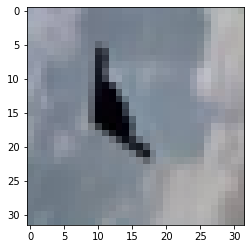

流式输出内容被截断，无法输出最后 5000 行内容。
  1    10880    1.381    1.370      104.4
  1    11008    1.356    1.372      104.6
  1    11136    1.332    1.369      104.8
  1    11264    1.446    1.362      105.0
  1    11392    1.522    1.378      105.2
  1    11520    1.314    1.407      105.4
  1    11648    1.402    1.389      105.6
  1    11776    1.238    1.391      105.8
  1    11904    1.398    1.361      106.0
  1    12032    1.286    1.368      106.2
  1    12160    1.276    1.352      106.4
  1    12288    1.386    1.336      106.6
  1    12416    1.035    1.346      106.9
  1    12544    1.276    1.284      107.1
  1    12672    1.150    1.282      107.3
  1    12800    1.409    1.256      107.5
  1    12928    1.365    1.286      107.7
  1    13056    1.252    1.302      107.9
  1    13184    1.390    1.292      108.1
  1    13312    1.371    1.312      108.3
  1    13440    1.272    1.323      108.5
  1    13568    1.265    1.313      108.7
  1    13696    1.343    1.304      108.9
  1    

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CIFAR. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
###############################################################################
# PyTorch implementation of CIFAR-10 classifier
###############################################################################
import time, os, sys, random, datetime
import argparse
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import datasets, transforms

print(torch.version.__version__)

###############################################################################
use_cuda = torch.cuda.is_available()
use_cuda = True
#use_cuda = False
###############################################################################
def cuda(arr):
    if use_cuda:
        return arr.cuda()
    return arr

###############################################################################
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

###############################################################################
# hyperparameters
###############################################################################
#learning_rate = 0.0001
learning_rate = 0.0003
#learning_rate = 0.001
#learning_rate = 0.003

global nEpochs
nEpochs = 14

#dropout = 0.0
#dropout = 0.1
#dropout = 0.3
#dropout = 0.5
dropout = 0.25

#L2_lambda = 0.0
L2_lambda = 0.001
#L2_lambda = 0.002

#mean = 0.5
#std = 0.5
mean = 0.0
std = 1.0

# log_interval has no effect on accuracy, only reporting
log_interval = 100
#log_interval = 10

###############################################################################
def resize(x, kernel_size, dilation, stride, padding):
    x = int(1 + (x + 2*padding - dilation * (kernel_size - 1) - 1)/stride)
    return x

###############################################################################
class CIFAR(nn.Module):
###############################################################################
    def __init__(self, specs, dropout=0.0):
        super(CIFAR, self).__init__()

        H, W, C0, C1, C2, C3, C4, C5, C6, C7, kernel_size, F1, F2, nClasses, padding = specs
        pooling = 2
        stride = 1
        dilation = 1

        #self.pool = pool = nn.AvgPool2d(pooling)
        self.pool = pool = nn.MaxPool2d(pooling)
      

        self.conv1 = nn.Conv2d(C0, C1, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        self.conv2 = nn.Conv2d(C1, C2, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        H = resize(H, pooling, dilation, pooling, 0)
        W = resize(W, pooling, dilation, pooling, 0)


        self.conv3 = nn.Conv2d(C2, C3, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        self.conv4 = nn.Conv2d(C3, C4, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        H = resize(H, pooling, dilation, pooling, 0)
        W = resize(W, pooling, dilation, pooling, 0)


        self.conv5 = nn.Conv2d(C4, C5, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        self.conv6 = nn.Conv2d(C5, C6, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        self.conv7 = nn.Conv2d(C6, C7, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        H = resize(H, pooling, dilation, pooling, 0)
        W = resize(W, pooling, dilation, pooling, 0)

        self.conv8 = nn.Conv2d(C7, C7, kernel_size, padding=padding)
        H = resize(H, kernel_size, dilation, stride, padding)
        W = resize(W, kernel_size, dilation, stride, padding)

        H = resize(H, pooling, dilation, pooling, 0)
        W = resize(W, pooling, dilation, pooling, 0)
        #print(H, W)
        F0 = H * W * C7

        self.linear0 = nn.Linear(F0, F1)
        self.linear1 = nn.Linear(F1, F2)
        self.linear2 = nn.Linear(F2, nClasses)

        self.non_linear = nn.LeakyReLU(negative_slope=0.01)
        
        self.dropout = nn.Dropout(dropout)

        for p in self.parameters(): # optionally apply different randomization
            if p.dim() > 1:
                nn.init.kaiming_normal_(p)
                pass

    #################################################################
    def forward(self, prev):
        nBatch = len(prev)
        #print(prev.shape)
        prev = self.conv1(prev)
        prev = self.conv2(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)
        prev = self.pool(prev)

        prev = self.conv3(prev)
        prev = self.conv4(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)
        prev = self.pool(prev)

        prev = self.conv5(prev)
        prev = self.conv6(prev)
        prev = self.conv7(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)
        prev = self.pool(prev)
        
        prev = self.conv8(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)
        prev = self.pool(prev)
        prev = prev.view(nBatch, -1)
        #print(prev.shape)

        prev = self.linear0(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)

        prev = self.linear1(prev)
        prev = self.non_linear(prev)
        prev = self.dropout(prev)


        prev = self.linear2(prev)

        return prev

###############################################################################
def train_CIFAR(model, train_loader, test_loader):
    if use_cuda:
        model = model.cuda()

    # define the loss function
    criterion = nn.CrossEntropyLoss(reduction='sum')

    # choose an optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)

    start = time.time()
    w_decay = 0.8 # this smooths the reported loss -- it has no effect on performance
    for e in range(nEpochs):
        total_train_images = 0
        total_train_loss = 0
        train_images = 0
        train_loss = 0
        w_images = 0
        w_loss = 0

        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = cuda(data), cuda(target)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_images += len(data)
            train_loss += loss.data.item()

            if train_images > log_interval:
                total_train_images += train_images
                total_train_loss += train_loss
                if w_images == 0:
                    w_loss = train_loss
                    w_images = train_images
                log_message(None, "%3d %8d %8.3f %8.3f     %6.1f" % (e, total_train_images, train_loss/train_images, w_loss/w_images, (time.time()-start)))

                w_images = w_decay * w_images + train_images
                w_loss   = w_decay * w_loss   + train_loss
                train_images = 0
                train_loss = 0

                #break # terminate epoch early - useful for debugging

        test_images = 0
        test_loss = 0
        nCorrect = 0
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                data, target = cuda(data), cuda(target)
                output = model(data)
                loss = criterion(output, target)

                test_images += len(data)
                test_loss += loss.data.item()
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max value
                nCorrect += pred.eq(target.view_as(pred)).sum().item() # count correct items

        log_message(log_file, "%3d %8d %8.3f %8.3f %8.3f %8.1f     %6.1f" % (e, (e+1)*total_train_images, total_train_loss/total_train_images, w_loss/w_images, test_loss/test_images, 100*nCorrect/test_images, (time.time()-start)))

    return model

###############################################################################
###############################################################################
def log_message(outf, message):
    print(message)
    if not outf is None:
        outf.write(message)
        outf.write("\n")
        outf.flush()

###############################################################################
def display_image(img):
    npimg = img * std + mean
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

###############################################################################
# start main
###############################################################################
if __name__ == "__main__":
    # process command line args
    #parser = argparse.ArgumentParser(description='cifar-10 recognition starter code with LeNet (1998) CNN')

    #parser.add_argument('-log', default='./log/CIFAR-temp.log', help='name of log file')
    #parser.add_argument('-noisy', default=2, type=int, help='level of reporting')
    #parser.add_argument('-path', default='./data/CIFAR', help='path of CIFAR data')
    #parser.add_argument('-path', required=True, help='path of CIFAR data')
    #parser.add_argument('-save', default='./model/CIFAR/temp.pth', help='saved model file')
    #parser.add_argument('-batch', default=64, type=int, help='batch size')
    #parser.add_argument('-epochs', default=nEpochs, type=int, help='number of epochs')
    
    log ='./log/CIFAR-temp.log'
    noisy = 2
    path ='./data/CIFAR' 
    save ='./model/CIFAR/temp.pth'
    batch = 64
    epochs = nEpochs

    #args = parser.parse_args()

    #print("args =",args)
    global log_file
    os.makedirs(os.path.dirname(log), exist_ok=True) # ensure output directory exists
    log_file = open(log, "a")
    log_message(log_file, "\nstarting run: %s %s" % (datetime.date.today(), datetime.datetime.now()))

    H=32    # don't change
    W=32    # don't change
    C0=3    # don't change
    C1=64
    C2=64
    C3=128
    C4=256
    C5=512
    C6=512
    C7=512
    kernel_size=3
    F1 = 1024
    F2 = 1024
    nClasses=10    # don't change
    padding=2

    specs = [H, W, C0, C1, C2, C3, C4, C5, C6, C7, kernel_size, F1, F2, nClasses, padding]
    model = CIFAR(specs, dropout=dropout)
    print(model)
    log_message(log_file, "specs = %s, dropout = %f L2 = %f, batch = %d" % (str(specs), dropout, L2_lambda, batch))

    data_path = path
    batch_size = batch
    test_batch_size = 1000 # test_batch_size has no effect on accuracy
    nEpochs = epochs

    # the following lines replace a lot of "boring" code
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=True, download=True,
            transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=batch_size, shuffle=True, **kwargs)

    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=False, 
            transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    # just for fun, let's display a random image
    batch = next(iter(train_loader))
    #print(batch)
    image = batch[0][0]
    label = batch[1][0]
    print(label, classes[label])
    display_image(image)
    
    model = train_CIFAR(model, train_loader, test_loader)

    os.makedirs(os.path.dirname(save), exist_ok=True) # ensure output directory exists
    torch.save(model, save)


**3.Implement transfer learning with VGG or any other network in torchvision.models.  
4.Tune your transfer model, and compare your original model with the fine-tuned transfer model.**

After change the hyperparameters to tune my transfer model, the fine-tuned transfer model finally achieves 82.9% accuracy.  
Comparing to my original model which achieves 80.8% accuracy, this transfer model works better than the original model.  
What's more, the loss of this model is less than the loss of original model, which means this transfer model has a more accurate result.
However, because the deeper network of VGG, the training process is slower than previous model.


1.4.0
True

starting run: 2020-02-23 2020-02-23 00:01:15.984369
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
  

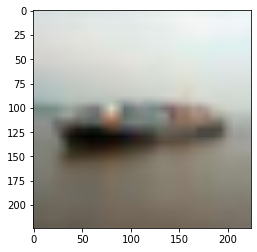

  0      128    2.298    2.298        0.9
  0      256    2.247    2.298        1.6
  0      384    2.167    2.277        2.2
  0      512    2.093    2.239        2.9
  0      640    2.004    2.196        3.6
  0      768    1.993    2.144        4.2
  0      896    1.792    2.106        4.9
  0     1024    1.710    2.031        5.6
  0     1152    1.539    1.956        6.2
  0     1280    1.445    1.863        6.9
  0     1408    1.396    1.771        7.6
  0     1536    1.393    1.691        8.3
  0     1664    1.307    1.628        8.9
  0     1792    1.400    1.561        9.6
  0     1920    1.203    1.527       10.3
  0     2048    1.072    1.461       11.0
  0     2176    1.382    1.381       11.6
  0     2304    1.175    1.381       12.3
  0     2432    1.078    1.339       13.0
  0     2560    1.203    1.286       13.7
  0     2688    1.240    1.270       14.3
  0     2816    0.930    1.264       15.0
  0     2944    0.942    1.196       15.7
  0     3072    0.986    1.145    

In [0]:
###############################################################################
# PyTorch implementation of CIFAR-10 classifier
###############################################################################
import time, os, sys, random, datetime
import argparse
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import datasets, transforms, models

print(torch.version.__version__)

###############################################################################
use_cuda = torch.cuda.is_available()
print(use_cuda)

#use_cuda = True
#use_cuda = False
###############################################################################
def cuda(arr):
    if use_cuda:
        return arr.cuda()
    return arr

###############################################################################
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

###############################################################################
# hyperparameters
###############################################################################
learning_rate = 0.0001
#learning_rate = 0.0003
#learning_rate = 0.001
#learning_rate = 0.003

global nEpochs
nEpochs = 6

#dropout = 0.0
dropout = 0.1
#dropout = 0.3
#dropout = 0.5

#L2_lambda = 0.0
L2_lambda = 0.001
#L2_lambda = 0.002

#mean = 0.5
#std = 0.5
mean = 0.0
std = 1.0

# log_interval has no effect on accuracy, only reporting
log_interval = 100
#log_interval = 10

###############################################################################
CIFAR = models.vgg16(pretrained=True)

for parma in CIFAR.parameters():
    parma.requires_grad = False

CIFAR.classifier = nn.Sequential(nn.Linear(25088, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5),
                                 nn.Linear(4096, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.5),
                                 nn.Linear(4096, 10))


###############################################################################
def train_CIFAR(model, train_loader, test_loader):
    if use_cuda:
        model = model.cuda()

    # define the loss function
    criterion = nn.CrossEntropyLoss(reduction='sum')

    # choose an optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)

    start = time.time()
    w_decay = 0.8 # this smooths the reported loss -- it has no effect on performance
    for e in range(nEpochs):
        total_train_images = 0
        total_train_loss = 0
        train_images = 0
        train_loss = 0
        w_images = 0
        w_loss = 0

        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = cuda(data), cuda(target)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_images += len(data)
            train_loss += loss.data.item()

            if train_images > log_interval:
                total_train_images += train_images
                total_train_loss += train_loss
                if w_images == 0:
                    w_loss = train_loss
                    w_images = train_images
                log_message(None, "%3d %8d %8.3f %8.3f     %6.1f" % (e, total_train_images, train_loss/train_images, w_loss/w_images, (time.time()-start)))

                w_images = w_decay * w_images + train_images
                w_loss   = w_decay * w_loss   + train_loss
                train_images = 0
                train_loss = 0

                #break # terminate epoch early - useful for debugging

        test_images = 0
        test_loss = 0
        nCorrect = 0
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                data, target = cuda(data), cuda(target)
                output = model(data)
                loss = criterion(output, target)

                test_images += len(data)
                test_loss += loss.data.item()
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max value
                nCorrect += pred.eq(target.view_as(pred)).sum().item() # count correct items

        log_message(log_file, "%3d %8d %8.3f %8.3f %8.3f %8.1f     %6.1f" % (e, (e+1)*total_train_images, total_train_loss/total_train_images, w_loss/w_images, test_loss/test_images, 100*nCorrect/test_images, (time.time()-start)))

    return model

###############################################################################
def log_message(outf, message):
    print(message)
    if not outf is None:
        outf.write(message)
        outf.write("\n")
        outf.flush()

###############################################################################
def display_image(img):
    npimg = img * std + mean
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

###############################################################################
# start main
###############################################################################
if __name__ == "__main__":
    # process command line args
    #parser = argparse.ArgumentParser(description='cifar-10 recognition starter code with LeNet (1998) CNN')

    #parser.add_argument('-log', default='./log/CIFAR-temp.log', help='name of log file')
    #parser.add_argument('-noisy', default=2, type=int, help='level of reporting')
    #parser.add_argument('-path', default='./data/CIFAR', help='path of CIFAR data')
    #parser.add_argument('-path', required=True, help='path of CIFAR data')
    #parser.add_argument('-save', default='./model/CIFAR/temp.pth', help='saved model file')
    #parser.add_argument('-batch', default=64, type=int, help='batch size')
    #parser.add_argument('-epochs', default=nEpochs, type=int, help='number of epochs')
    
    log ='./log/CIFAR-temp.log'
    noisy = 2
    path ='./data/CIFAR' 
    save ='./model/CIFAR/temp.pth''
    batch = 64
    epochs = nEpochs

    #print("args =",args)
    global log_file
    os.makedirs(os.path.dirname(log), exist_ok=True) # ensure output directory exists
    log_file = open(log, "a")
    log_message(log_file, "\nstarting run: %s %s" % (datetime.date.today(), datetime.datetime.now()))



    #specs = [H, W, C0, C1, C2, kernel_size, F1, F2, nClasses, padding]
    model = CIFAR
    print(model)
    log_message(log_file, " dropout = %f L2 = %f, batch = %d" % (dropout, L2_lambda, batch))

    data_path = path
    batch_size = batch
    test_batch_size = 100 # test_batch_size has no effect on accuracy
    nEpochs = epochs

    # the following lines replace a lot of "boring" code
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=True, download=True,
            transform=transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=batch_size, shuffle=True, **kwargs)

    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=False, 
            transform=transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    # just for fun, let's display a random image
    batch = next(iter(train_loader))
    #print(batch)
    image = batch[0][0]
    label = batch[1][0]
    print(label, classes[label])
    display_image(image)
    
    model = train_CIFAR(model, train_loader, test_loader)

    os.makedirs(os.path.dirname(save), exist_ok=True) # ensure output directory exists
    torch.save(model, save)


### **Autoencoder**

**1.An autoencoder is able to extract / filter key information in one image. The whole structure of this network is like an hourglass.  
2.The red layer is called ‘code’ layer and it is the layer with the smallest size. An autoencoder first squeezes images through encoder into the code layer then reconstructs the whole image from the code layer into the same dimension as the initial image. So the training inputs and training targets are the same images.  
3.Convert your classifier from the task above into an autoencoder and train it using the ​CIFAR10​ dataset. Look at several inputs and outputs. How much degradation does your autoencoder introduce?**

Because the loss function shows the difference between original image and output image, so I use this value to evaluate the degration my autoencoder introduct.  
The loss funtion of my model is 0.0073, which means my model didn't produce a notice degradation. The picture below is several inputs and outputs, we can find that the output image is almost as clear as the input image.

<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model4.png" width=495 height=330 />

1.4.0

starting run: 2020-02-25 2020-02-25 02:35:35.903737
AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 48, kernel_size=(4, 4), stride=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(48, 32, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(4, 4), stride=(1, 1))
    (5): Sigmoid()
  )
)
dropout = 0.000000 L2 = 0.000000, batch = 64
Files already downloaded and verified
tensor(6) frog


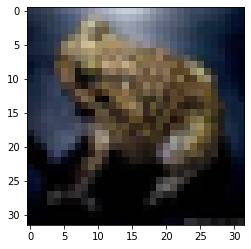

  0      128    0.012    0.012    1.487       0.1
  0      256    0.011    0.012    1.406       0.1
  0      384    0.011    0.011    1.381       0.2
  0      512    0.011    0.011    1.371       0.2
  0      640    0.011    0.011    1.367       0.2
  0      768    0.011    0.011    1.357       0.3
  0      896    0.011    0.011    1.355       0.3
  0     1024    0.011    0.011    1.345       0.3
  0     1152    0.011    0.011    1.344       0.4
  0     1280    0.010    0.011    1.334       0.4
  0     1408    0.010    0.011    1.329       0.4
  0     1536    0.010    0.011    1.309       0.4
  0     1664    0.010    0.010    1.319       0.5
  0     1792    0.010    0.010    1.312       0.5
  0     1920    0.010    0.010    1.307       0.6
  0     2048    0.010    0.010    1.307       0.6
  0     2176    0.010    0.010    1.291       0.6
  0     2304    0.010    0.010    1.296       0.6
  0     2432    0.010    0.010    1.281       0.7
  0     2560    0.010    0.010    1.274       0.7


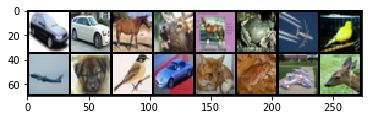

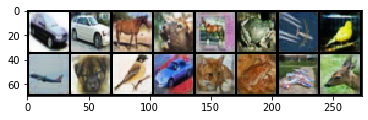

In [9]:
###############################################################################
# PyTorch implementation of CIFAR-10 classifier
###############################################################################
import time, os, sys, random, datetime
import argparse
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

import warnings
warnings.filterwarnings('ignore')

print(torch.version.__version__)

###############################################################################
use_cuda = torch.cuda.is_available()
#use_cuda = True
#use_cuda = False
###############################################################################
def cuda(arr):
    if use_cuda:
        return arr.cuda()
    return arr

###############################################################################
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

###############################################################################
# hyperparameters
###############################################################################
#learning_rate = 0.0001
learning_rate = 0.0003
#learning_rate = 0.001
#learning_rate = 0.003

global nEpochs
nEpochs = 10

dropout = 0.0
#dropout = 0.1
#dropout = 0.3
#dropout = 0.5

L2_lambda = 0.0
#L2_lambda = 0.001
#L2_lambda = 0.002

#mean = 0.5
#std = 0.5
mean = 0.0
std = 1.0

# log_interval has no effect on accuracy, only reporting
log_interval = 100
#log_interval = 10

###############################################################################


###############################################################################
class AutoEncoder(nn.Module):
###############################################################################
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 4, stride=1, padding=0),    #[16, 16, 16]
            nn.ReLU(),
            nn.Conv2d(16, 32, 4, stride=1, padding=0),   #[32, 8, 8]
            nn.ReLU(),
            nn.Conv2d(32, 48, 4, stride=1, padding=0),     # [48, 4, 4]
            nn.ReLU(),
            #nn.Conv2d(64, 96, 4, stride=2, padding=1),
            #nn.ReLU(),

        )

        self.decoder = nn.Sequential(
            #nn.ConvTranspose2d(96, 64, 4, stride=2, padding=1),
            #nn.ReLU(),
            nn.ConvTranspose2d(48, 32, 4, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 4, stride=1, padding=0),
            nn.Sigmoid()
        )

        for p in self.parameters():  # optionally apply different randomization
            if p.dim() > 1:
                nn.init.kaiming_normal_(p)
                pass

#################################################################
    def forward(self, prev):
        prev = self.encoder(prev)
        prev = self.decoder(prev)

        return prev

###############################################################################
def train_CIFAR(model, train_loader):
    if use_cuda:
        model = model.cuda()

    # define the loss function
    criterion = nn.BCELoss()

    # choose an optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)
    #optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate, weight_decay=L2_lambda)

    start = time.time()
    w_decay = 0.8 # this smooths the reported loss -- it has no effect on performance
    for e in range(nEpochs):
        total_train_images = 0
        total_train_loss = 0
        train_images = 0
        train_loss = 0
        w_images = 0
        w_loss = 0

        model.train()
        for batch_idx, (data, _) in enumerate(train_loader):
            data = cuda(data)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data)
            loss.backward()
            optimizer.step()
            train_images += len(data)
            train_loss += loss.data.item()

            if train_images > log_interval:
                total_train_images += train_images
                total_train_loss += train_loss
                if w_images == 0:
                    w_loss = train_loss
                    w_images = train_images
                
                log_message(None, "%3d %8d %8.3f %8.3f %8.3f    %6.1f" % (e, total_train_images, train_loss/train_images, w_loss/w_images, train_loss, (time.time()-start)))
                
                w_images = w_decay * w_images + train_images
                w_loss   = w_decay * w_loss   + train_loss
                train_images = 0
                train_loss = 0
                       
        #BCE0 = (((data - output)**2).sum()) / len(data)
        #print("Binary Corss Entropy for train data =", BCE0)

                #break # terminate epoch early - useful for debugging

        test_images = 0
        test_loss = 0
        nCorrect = 0
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, _) in enumerate(test_loader):
                data = cuda(data)
                output = model(data)
                loss = criterion(output, data)

                test_images += len(data)
                test_loss += loss.data.item()
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max value
                #nCorrect += pred.eq(data.view_as(pred)).sum().item() # count correct items

        log_message(log_file, "%3d %8d %8.3f %8.3f %8.3f     %6.1f" % (e, (e+1)*total_train_images, total_train_loss/total_train_images, w_loss/w_images, test_loss/test_images,  (time.time()-start)))
        BCE0 = (((data - output)**2).sum()) / test_images
        print("Binary Corss Entropy for train data =", BCE0)

    return model

###############################################################################
###############################################################################
def log_message(outf, message):
    print(message)
    if not outf is None:
        outf.write(message)
        outf.write("\n")
        outf.flush()

###############################################################################
def display_image(img):
    #npimg = img * std + mean
    npimg = img.cpu().numpy()
    #plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

##############################################################################


###############################################################################
# start main
###############################################################################
if __name__ == "__main__":
    # process command line args
    #parser = argparse.ArgumentParser(description='cifar-10 recognition starter code with LeNet (1998) CNN')

    #parser.add_argument('-log', default='./log/CIFAR-temp.log', help='name of log file')
    #parser.add_argument('-noisy', default=2, type=int, help='level of reporting')
    #parser.add_argument('-path', default='./data/CIFAR', help='path of CIFAR data')
    #parser.add_argument('-path', required=True, help='path of CIFAR data')
    #parser.add_argument('-save', default='./model/CIFAR/temp.pth', help='saved model file')
    #parser.add_argument('-batch', default=64, type=int, help='batch size')
    #parser.add_argument('-epochs', default=nEpochs, type=int, help='number of epochs')
    
    log ='./log/CIFAR-temp.log'
    noisy = 2
    path ='./data/CIFAR' 
    save ='./model/CIFAR/temp.pth'
    batch = 64
    epochs = nEpochs

    #print("args =",args)
    global log_file
    os.makedirs(os.path.dirname(log), exist_ok=True) # ensure output directory exists
    log_file = open(log, "a")
    log_message(log_file, "\nstarting run: %s %s" % (datetime.date.today(), datetime.datetime.now()))



    model = AutoEncoder()
    print(model)
    log_message(log_file, "dropout = %f L2 = %f, batch = %d" % (dropout, L2_lambda, batch))

    data_path = path
    batch_size = batch
    test_batch_size = 16 # test_batch_size has no effect on accuracy
    nEpochs = epochs

    # the following lines replace a lot of "boring" code
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=True, download=True,
            transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=batch_size, shuffle=True, **kwargs)

    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10(data_path, train=False, 
            transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean, mean, mean), (std, std, std))])),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    # just for fun, let's display a random image
    batch = next(iter(train_loader))
    #print(batch)
    image = batch[0][0]
    label = batch[1][0]
    print(label, classes[label])
    display_image(image)


    model = train_CIFAR(model, train_loader)

    #randomly print the result
    dataiter =iter(test_loader)
    images, labels = dataiter.next()
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(16)))
    display_image(torchvision.utils.make_grid(images))
    #display_image(torchvision.utils.make_grid(images), False)

    images = Variable(cuda(images))

    decode_image = model(images)
    display_image(torchvision.utils.make_grid(decode_image.data))
    #display_image(torchvision.utils.make_grid(decode_image.data), False)

    
    os.makedirs(os.path.dirname(save), exist_ok=True) # ensure output directory exists
    torch.save(model, save)

**4.Test your autoencoder with different numbers and sizes of encoder and decoder layers, and different size of code layer. Try to achieve the least degradation with the smallest code layer. Compare several outputs and inputs, check if your model is able to handle this task well.**

|Model|  Parameter of Encoder Layer   |  Size of Code Layer | Loss |
|:----:|  :----:  | :----:  | :----: |
|1| conv1(3, 16, 4, stride=2, padding=1)  |  |     |
|| conv2(16, 32, 4, stride=2, padding=1)  |  |    |
||conv3(32, 64, 4, stride=2, padding=1)| 4x4x64 | 0.0154|
| | |
|2|conv1(3, 16, 4, stride=2, padding=1)|  | |
||conv2(16, 32, 4, stride=2, padding=1)| | |
||conv3(32, 64, 4, stride=2, padding=1)| | |
||conv4(64, 96, 4, stride=2, padding=1)| 2x2x64| 0.0300|
| | 
|3|conv1(3, 16, 9, stride=1, padding=0)
|| conv2(16, 32, 9, stride=1, padding=0)  |  |    |
||conv3(32, 64, 9, stride=1, padding=0)| 4x4x64 |0.0202
| |
4| conv1(3, 16, 4, stride=2, padding=1)  |  |     |
|| conv2(16, 32, 4, stride=2, padding=1)  |  |    |
||conv3(32, 48, 4, stride=2, padding=1)| 4x4x48 | 0.0073|

From the form above, we can find that the last Autoencoder model(model 4) has the smallest loss, which means this model could achieve the least degradation with code layer 4x4x48.  
From several inputs and outputs of these models, we could also see the last model works well.

<center>
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model1.png" width=495 height=330 />
Figure1 Model 1
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model2.png" width=495 height=330 />
Figure2 Model 2
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model3.png" width=495 height=330 />
Figure3 Model 3
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model4.png" width=495 height=330 />
Figure4 Model 4
</center>

**5.An autoencoder acts as a lossy compression algorithm. The original images are 32x32x3 (3072) bytes. How much can you compress these images before you notice significant degradation?**

After trying different numbers and sizes of encoder and decoder layers, I found that the code layer of 4x4x48(768 bytes) is the smallest that can compress before noticing significant degradation. If the compressed images are smaller than this size, they couldn't keep the original features clearly after decoding. Just like the pictures below, first is code layer of 4x4x48 and second is 2x2x96. It is obvious that second compress has a significant degradation.


<center>
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model4.png" width=495 height=330 />
Figure1 code layer 4x4x48
<img src="https://github.com/linkia-xuan/Markdown_photo/raw/master/model2.png" width=495 height=330 />
Figure2 code layer 2x2x96
</center>

### **Non-coding problems**

**1.Explain the reason why CNNs are able to capture key information in most cases.**

* CNN extracts local features in the image through the convolutional layer. 
This process can be understood as using a filter (convolutional kernel) to filter each small region of the image, then CNN could obtain the features of these small regions and successfully capture the key information in terms of the whole image.
* CNN's pooling layer can shrink the input image and reduce the pixel information. During pooling process,only the key information is left. Also, the pooling layer can reduce the data dimension more effectively than convolution layer. So it can greatly reduce the computation and effectively avoid overfitting.

**2.What are the advantages and disadvantages of CNNs in general? (at least 2 for each)**

Advantages:  
1.Training data like images can be directly taken as input, there's no need for manual image preprocessing and additional complex operations such as feature extraction.  
2.CNN can effectively capture the key information of images from convolution opration.  
3.CNN can effectively reduce the image dimension from large data volume into small data volume.  

Disadvantages:  
1.CNN has a demand for huge training datasets.  
2.It usually takes a long time to training CNN model.